In [1]:
from notebook_imports import *
import warnings
warnings.filterwarnings("ignore")

/home/damiano/myenvs/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


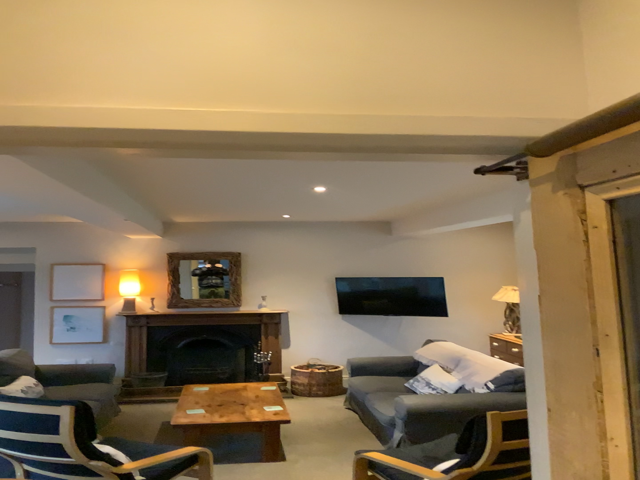

In [ ]:
image = load_image('resources/demo.jpg')
sample_query = "Which object has the largest height-to-width ratio: the tv or the leftmost paining?"
display(image)

In [3]:
# Initialize predefined modules
initialize_modules()

Initializing OpenAI Client
Initializing GroundingDINO
final text_encoder_type: bert-base-uncased
Initializing UniDepth


In [4]:
predef_api = display_predef_api()

                                                                                                                   
"""                                                                                                                
Locates objects in an image. Object prompts should be simple and contain few words. To return all objects, pass    
"objects" as the prompt.                                                                                           
                                                                                                                   
Args:                                                                                                              
    image (image): Image to search.                                                                                
    object_prompt (string): Description of object to locate.                                                       
Returns:                                                                                                           
    list: A list of bounding boxes [xmin, ymin, xmax, ymax] for all of the objects located in pixel space.         
"""                                                                                                                
def loc(image, object_prompt):                                                                                     
                                                                                                                   
"""                                                                                                                
Answers a question about an object shown in a bounding box.                                                        
                                                                                                                   
Args:                                                                                                              
    image (image): Image of the scene.                                                                             
    question (string): Question about the object in the bounding box.                                              
    bbox (list): A bounding box [xmin, ymin, xmax, ymax] containing the object.                                    
                                                                                                                   
                                                                                                                   
Returns:                                                                                                           
    string: Answer to the question about the object in the image.                                                  
"""                                                                                                                
def vqa(image, question, bbox):                                                                                    
                                                                                                                   
"""                                                                                                                
Returns the depth of an object (specified by a bounding box) in meters.                                            
                                                                                                                   
Args:                                                                                                              
    image (image): Image of the scene.                                                                             
    bbox (list): A bounding box [xmin, ymin, xmax, ymax] containing the object.                                    
                                                                                                                   
Returns:                                                

In [5]:
# Pass query to signature agent to see if new methods need to be defined
generated_signatures, generated_docstrings = signature_agent(predef_api=predef_api, query=sample_query)
display_generated_signatures(generated_signatures, generated_docstrings)

                                                                                                                   
Calculates the height-to-width ratio of an object specified by a bounding box.                                     
                                                                                                                   
Args:                                                                                                              
    image (image): Image of the scene.                                                                             
    bbox (list): A bounding box [xmin, ymin, xmax, ymax] containing the object.                                    
                                                                                                                   
Returns:                                                                                                           
    float: The height-to-width ratio of the object.                                                                
                                                                                                                   
def _get_height_to_width_ratio(image, bbox):                                                                       
                                                                                                                   

In [6]:
# Pass signatures to api agent to implement new methods
api = api_agent(predef_api, generated_signatures, generated_docstrings)
display_generated_api(api)

  1                                                                                                                
  2 def _get_height_to_width_ratio(image, bbox):                                                                   
  3                                                                                                                
  4     width, height = get_2D_object_size(image, bbox)                                                            
  5     return height / width                                                                                      
  6                                                                                                                

In [7]:
# Implement program to solve query
program = program_agent(api, sample_query)
display_generated_program(program, api)

   8                                                                                                               
   9     # Step 1: Locate the TV                                                                                   
  10     tv_bboxes = loc(image, "tv")                                                                              
  11                                                                                                               
  12     # Step 2: Locate the paintings                                                                            
  13     painting_bboxes = loc(image, "painting")                                                                  
  14                                                                                                               
  15     # Step 3: Find the leftmost painting                                                                      
  16     leftmost_painting_bbox = None                                                                             
  17     min_x = float('inf')                                                                                      
  18     for bbox in painting_bboxes:                                                                              
  19         if bbox[0] < min_x:                                                                                   
  20             min_x = bbox[0]                                                                                   
  21             leftmost_painting_bbox = bbox                                                                     
  22                                                                                                               
  23     # Step 4: Calculate height-to-width ratio for the TV                                                      
  24     tv_ratio = _get_height_to_width_ratio(image, tv_bboxes[0])                                                
  25                                                                                                               
  26     # Step 5: Calculate height-to-width ratio for the leftmost painting                                       
  27     painting_ratio = _get_height_to_width_ratio(image, leftmost_painting_bbox)                                
  28                                                                                                               
  29     # Step 6: Compare the ratios and determine which object has the larger ratio                              
  30     if tv_ratio > painting_ratio:                                                                             
  31         final_result = "tv"                                                                                   
  32     else:                                                                                                     
  33         final_result = "leftmost painting"                                                                    
  34                                                                                                               


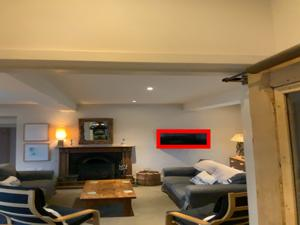
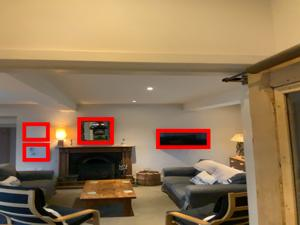
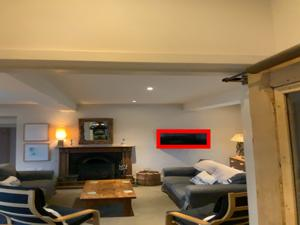
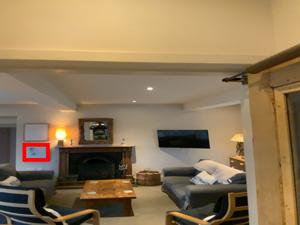

In [8]:
# Execute program
final_result, html_trace = execute_program(program, image, api)
display(HTML(html_trace))


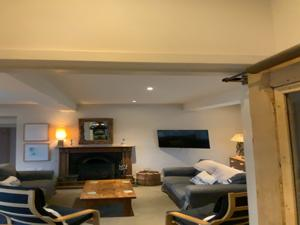

In [9]:
# Show output & ground truth
ground_truth = "leftmost painting"
display(HTML(display_result(final_result, image, sample_query, ground_truth)))
 